<div>
<img style="float:left; border-radius:50%" src="https://avatars2.githubusercontent.com/u/58553327?s=460&u=3276252f07fb379c248bc8c9ce344bfdcaed7c45&v=4" width="40px">
<a href="https://github.com/carlosholivan"><img src="https://www.sferalabs.cc/wp-content/uploads/github-logo.png" width=70px style="float: right;"></a>
</div>

<a name="top"></a>

# CNN VAE <a name="top"></a>

In this notebook it is described how to compute different time-frequency inputs with <strong>compute_input_from_audiopath</strong> function.

Author: Carlos Hernández Oliván<br>
Last update: 7 November 2020
  

### Table of Contents <a name="index"></a>
 
0. [Check GPU and Troch versions](#checks)

1. [Preprocessing data](#preprocess)

2. [Create Dataloader](#dataloader)

3. [VAE Model](#model)

4. [Run Training](#training)

5. [Visualizining Latent Spaces](#visualizing)

    5.1. [2 Latent dimensions](#2d)

    5.2. [3 latent dimensions](#3d)
    
    5.3. [Animations](#animations)

6. [Reconstruction](#reconstruction)
    
[References](#references)

In [1]:
import glob
import csv
import sys, os.path

import sklearn
import torch
from torch import optim, nn
from torch.utils.data import DataLoader
from torchvision import transforms
#from torch.utils.tensorboard import SummaryWriter
#from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Our modules
import sys
sys.path.append('.')
sys.path.append('..')

from vae import configs, train, plot_utils, models
from vae.data import build_dataloader
from vae.latent_spaces import dimensionality_reduction, plot_spaces
from vae.reconstructions import plot_reconstructions
from vae.models import model_utils
from vae.train import training

## 0. Check GPU and Troch versions<a name="checks"></a>

In [3]:
torch.__version__

'0.4.1.post2'

In [4]:
!lspci | grep -i nvidia

01:00.0 VGA compatible controller: NVIDIA Corporation GM200 [GeForce GTX 980 Ti] (rev a1)
01:00.1 Audio device: NVIDIA Corporation GM200 High Definition Audio (rev a1)


!sudo apt install nvidia-cuda-toolkit

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
!nvidia-smi

Mon Apr 12 11:38:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.56       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 980 Ti  Off  | 00000000:01:00.0 Off |                  N/A |
| 47%   69C    P0    93W / 250W |     48MiB /  6080MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>
    
</div>

## 4. RUN TRAINING <a name="training"></a>

In [8]:
tensorboard = False
if tensorboard:
    # Load the TensorBoard notebook extension
    %load_ext tensorboard
    %tensorboard --logdir ../runs

Building dataloaders...
Dataloaders have been built.
Number of files in the training dataset: 11630
Number of files in the validation dataset: 1357


  0%|          | 0/727 [00:00<?, ?it/s]

Start training model on cuda ...
Epoch: 0


100%|██████████| 727/727 [01:39<00:00,  7.61it/s]

training_avg_loss=23324.68
 training_avg_kld=59.47
 training_avg_rec=23294.95



val_avg_loss=12842.95



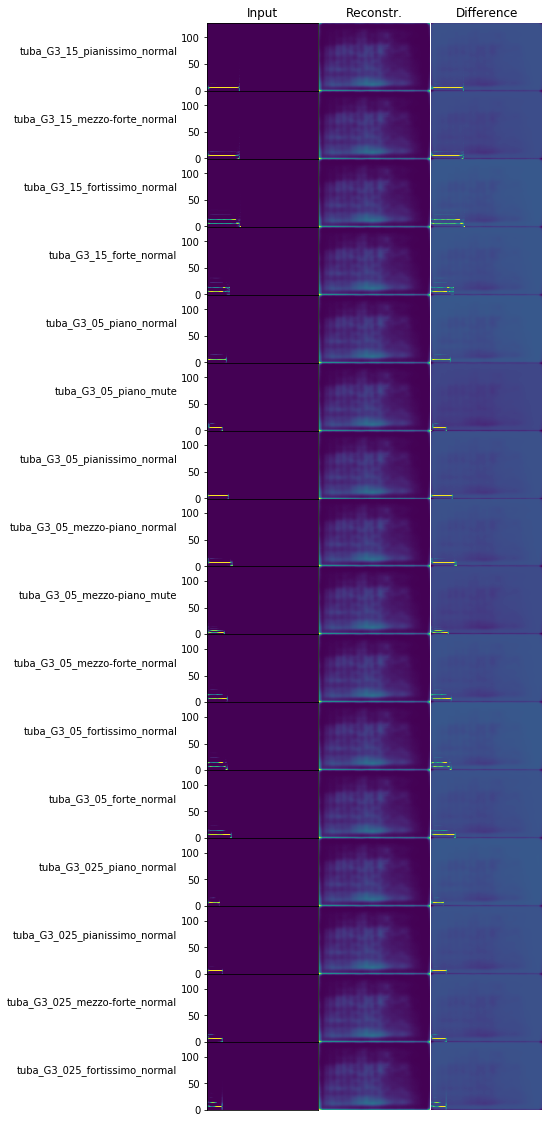

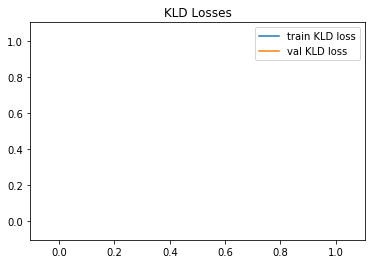

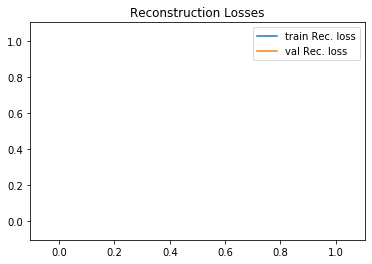

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 1


100%|██████████| 727/727 [01:39<00:00,  7.62it/s]

training_avg_loss=7915.51
 training_avg_kld=491.77
 training_avg_rec=7669.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7624.74

Epoch: 2


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6958.33
 training_avg_kld=633.44
 training_avg_rec=6641.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7106.77

Epoch: 3


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6635.86
 training_avg_kld=690.23
 training_avg_rec=6290.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6838.68

Epoch: 4


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6321.38
 training_avg_kld=739.25
 training_avg_rec=5951.76




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6361.75

Epoch: 5


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5997.96
 training_avg_kld=813.94
 training_avg_rec=5590.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6169.59

Epoch: 6


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5814.35
 training_avg_kld=849.76
 training_avg_rec=5389.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5893.16

Epoch: 7


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5698.19
 training_avg_kld=865.46
 training_avg_rec=5265.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5837.08

Epoch: 8


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5609.08
 training_avg_kld=866.57
 training_avg_rec=5175.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5713.27

Epoch: 9


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5540.03
 training_avg_kld=866.97
 training_avg_rec=5106.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5636.91

Epoch: 10


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5481.61
 training_avg_kld=868.22
 training_avg_rec=5047.50



val_avg_loss=5628.44



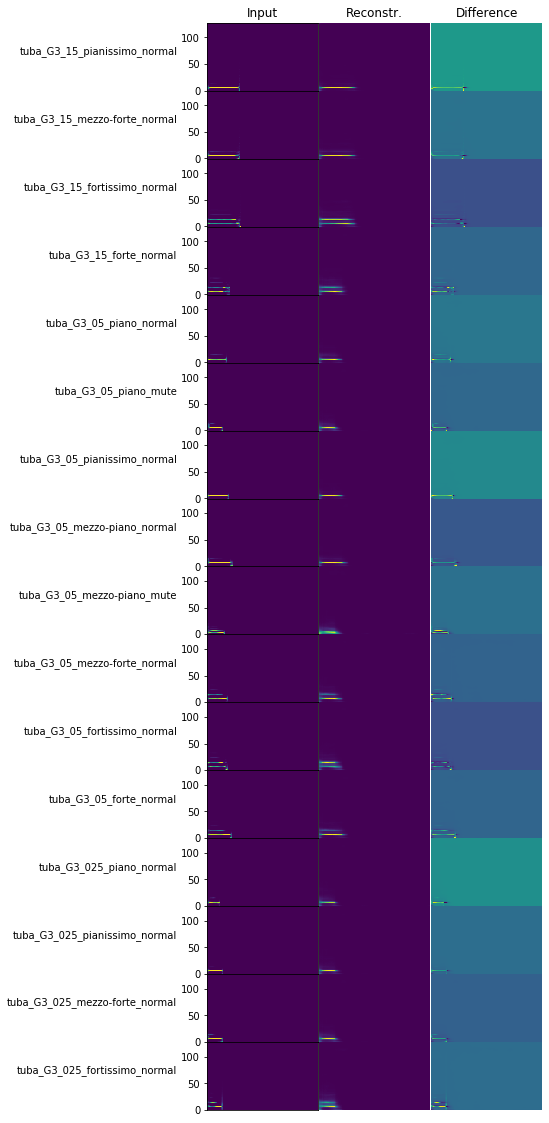

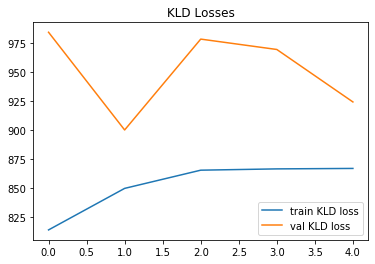

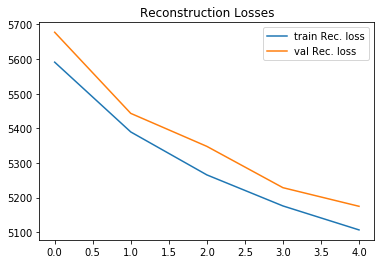

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 11


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5421.73
 training_avg_kld=862.71
 training_avg_rec=4990.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5558.47

Epoch: 12


100%|██████████| 727/727 [01:40<00:00,  7.52it/s]

training_avg_loss=5377.38
 training_avg_kld=864.61
 training_avg_rec=4945.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5517.09

Epoch: 13


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5334.84
 training_avg_kld=859.75
 training_avg_rec=4904.96




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5487.76

Epoch: 14


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5297.99
 training_avg_kld=861.63
 training_avg_rec=4867.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5486.35

Epoch: 15


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5262.46
 training_avg_kld=857.04
 training_avg_rec=4833.94




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5447.39

Epoch: 16


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5233.44
 training_avg_kld=858.41
 training_avg_rec=4804.23




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5424.42

Epoch: 17


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5199.02
 training_avg_kld=851.86
 training_avg_rec=4773.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5322.75

Epoch: 18


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5172.49
 training_avg_kld=852.44
 training_avg_rec=4746.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5300.43

Epoch: 19


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5144.06
 training_avg_kld=843.12
 training_avg_rec=4722.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5313.01

Epoch: 20


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5123.91
 training_avg_kld=843.94
 training_avg_rec=4701.94



val_avg_loss=5249.11



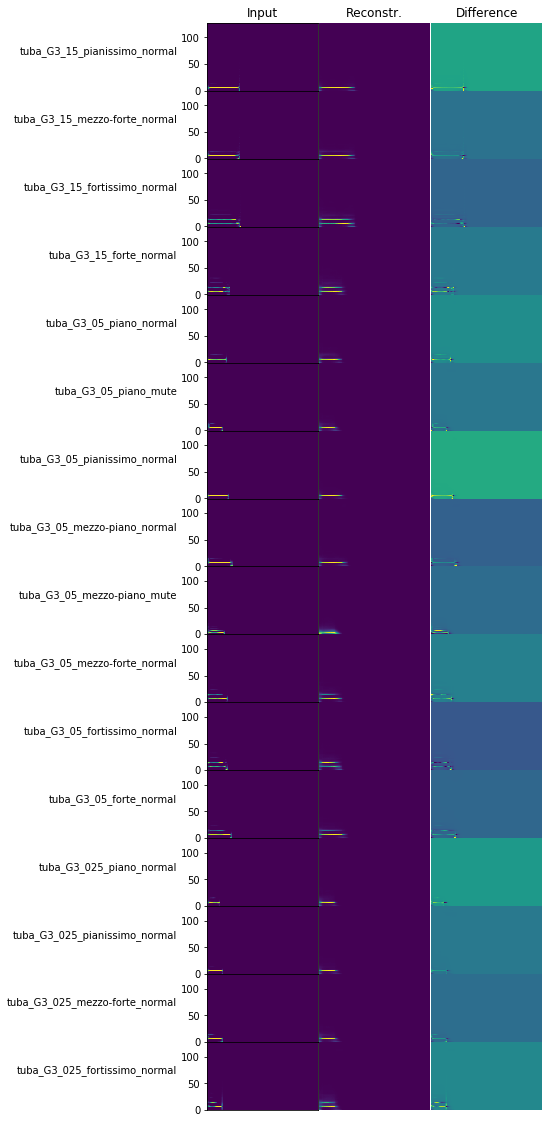

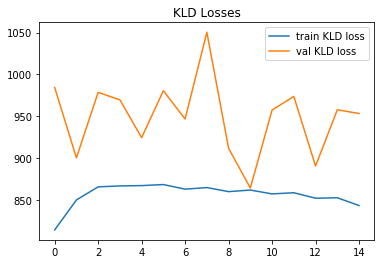

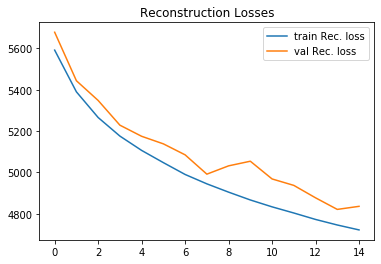

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 21


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5101.97
 training_avg_kld=840.12
 training_avg_rec=4681.91




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5258.74

Epoch: 22


100%|██████████| 727/727 [01:40<00:00,  7.52it/s]

training_avg_loss=5079.91
 training_avg_kld=839.76
 training_avg_rec=4660.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5255.49

Epoch: 23


100%|██████████| 727/727 [01:40<00:00,  7.62it/s]

training_avg_loss=5059.04
 training_avg_kld=835.62
 training_avg_rec=4641.23




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5221.90

Epoch: 24


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5041.87
 training_avg_kld=834.68
 training_avg_rec=4624.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5193.00

Epoch: 25


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5023.52
 training_avg_kld=828.22
 training_avg_rec=4609.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5210.65

Epoch: 26


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5008.50
 training_avg_kld=825.94
 training_avg_rec=4595.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5155.43

Epoch: 27


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4987.42
 training_avg_kld=821.60
 training_avg_rec=4576.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5138.25

Epoch: 28


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4973.31
 training_avg_kld=818.35
 training_avg_rec=4564.13




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5077.68

Epoch: 29


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4960.18
 training_avg_kld=817.71
 training_avg_rec=4551.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5167.20

Epoch: 30


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4947.80
 training_avg_kld=817.93
 training_avg_rec=4538.83



val_avg_loss=5141.39



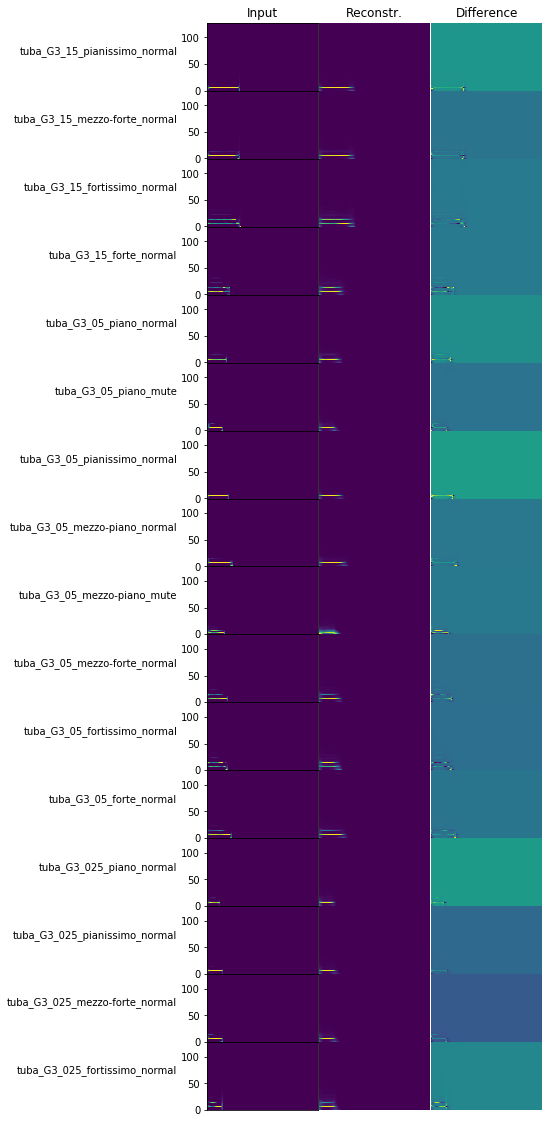

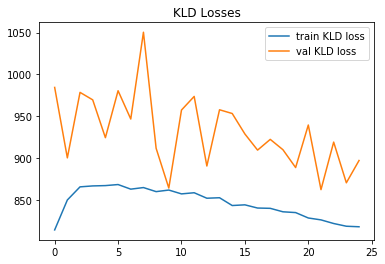

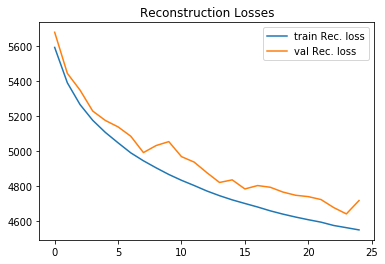

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 31


100%|██████████| 727/727 [01:39<00:00,  7.61it/s]

training_avg_loss=4938.44
 training_avg_kld=816.53
 training_avg_rec=4530.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5098.16

Epoch: 32


100%|██████████| 727/727 [01:40<00:00,  7.53it/s]

training_avg_loss=4922.39
 training_avg_kld=813.96
 training_avg_rec=4515.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5069.89

Epoch: 33


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4909.93
 training_avg_kld=810.94
 training_avg_rec=4504.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5055.57

Epoch: 34


100%|██████████| 727/727 [01:40<00:00,  7.51it/s]

training_avg_loss=4900.72
 training_avg_kld=809.40
 training_avg_rec=4496.02




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5130.82

Epoch: 35


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4890.10
 training_avg_kld=808.95
 training_avg_rec=4485.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5028.61

Epoch: 36


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4880.61
 training_avg_kld=809.03
 training_avg_rec=4476.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4996.86

Epoch: 37


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4871.00
 training_avg_kld=805.31
 training_avg_rec=4468.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5015.17

Epoch: 38


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4864.69
 training_avg_kld=808.08
 training_avg_rec=4460.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4994.54

Epoch: 39


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4853.71
 training_avg_kld=803.32
 training_avg_rec=4452.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=5032.89

Epoch: 40


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4844.62
 training_avg_kld=802.07
 training_avg_rec=4443.58



val_avg_loss=4978.53



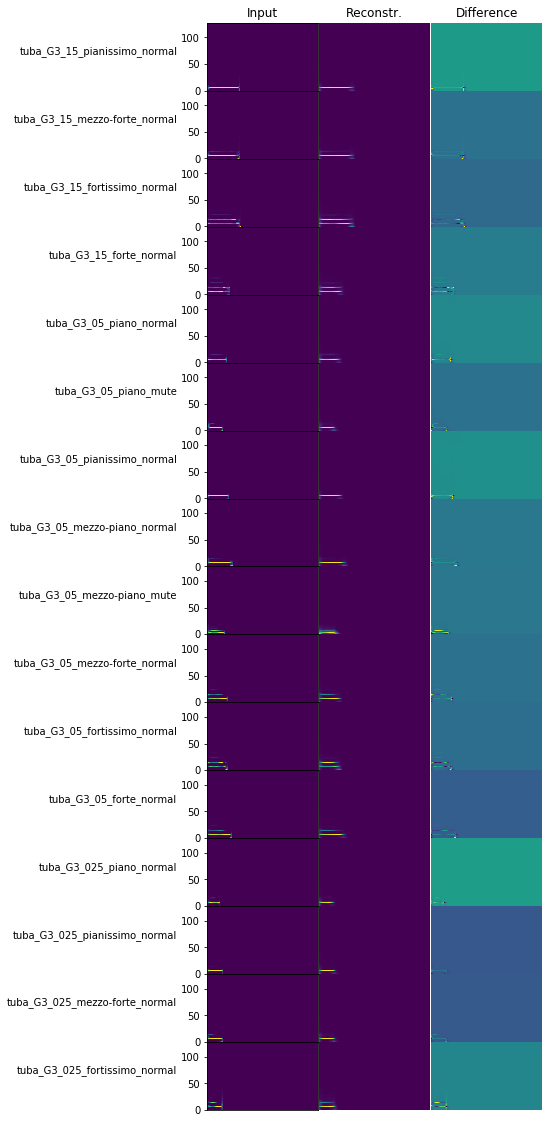

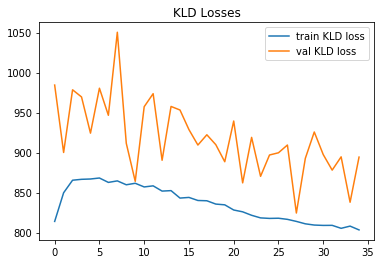

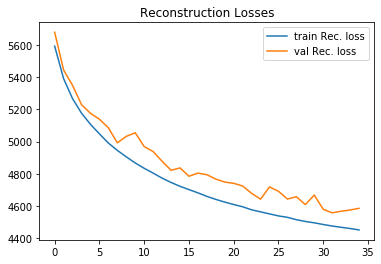

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 41


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4838.46
 training_avg_kld=802.10
 training_avg_rec=4437.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4985.37

Epoch: 42


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4830.65
 training_avg_kld=799.52
 training_avg_rec=4430.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4994.75

Epoch: 43


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4824.18
 training_avg_kld=801.52
 training_avg_rec=4423.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4957.34

Epoch: 44


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4816.63
 training_avg_kld=799.87
 training_avg_rec=4416.69




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4972.20

Epoch: 45


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4807.37
 training_avg_kld=794.75
 training_avg_rec=4409.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4944.14

Epoch: 46


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4801.09
 training_avg_kld=795.42
 training_avg_rec=4403.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4956.78

Epoch: 47


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4795.79
 training_avg_kld=794.01
 training_avg_rec=4398.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4936.60

Epoch: 48


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4789.54
 training_avg_kld=792.81
 training_avg_rec=4393.13




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4928.52

Epoch: 49


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4785.13
 training_avg_kld=793.73
 training_avg_rec=4388.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4919.72

Epoch: 50


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4778.72
 training_avg_kld=792.97
 training_avg_rec=4382.24



val_avg_loss=4925.76



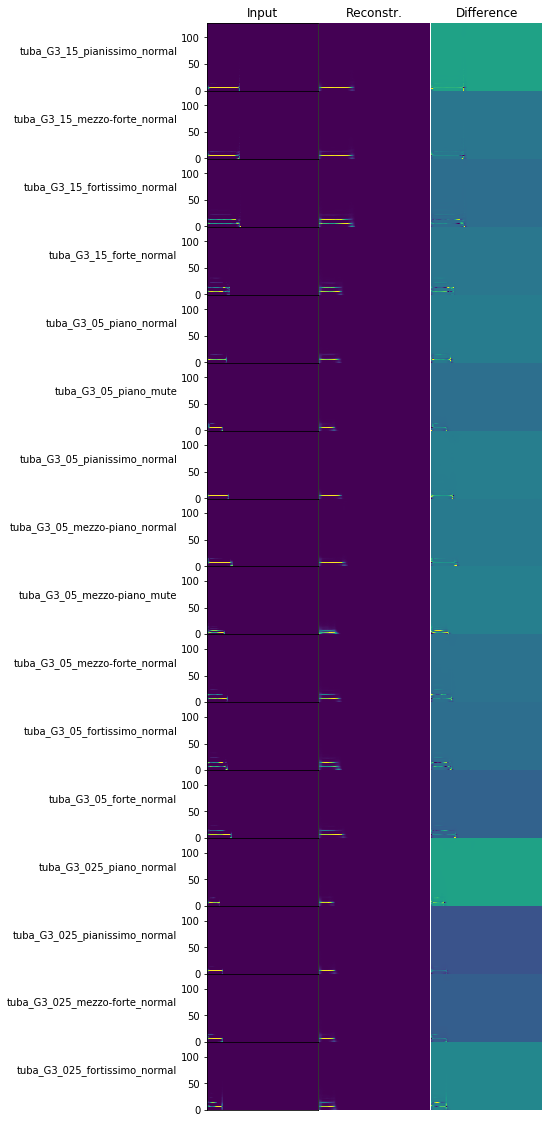

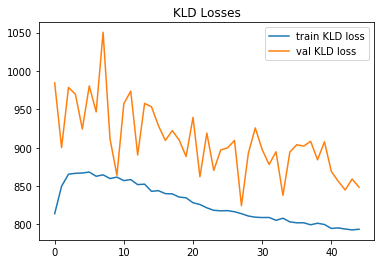

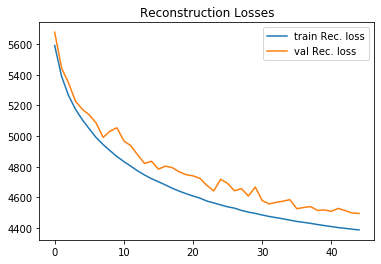

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 51


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4771.22
 training_avg_kld=791.91
 training_avg_rec=4375.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4913.28

Epoch: 52


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4764.30
 training_avg_kld=787.13
 training_avg_rec=4370.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4930.05

Epoch: 53


100%|██████████| 727/727 [01:40<00:00,  7.53it/s]

training_avg_loss=4760.81
 training_avg_kld=788.64
 training_avg_rec=4366.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4905.66

Epoch: 54


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4755.08
 training_avg_kld=787.13
 training_avg_rec=4361.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4879.78

Epoch: 55


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4752.77
 training_avg_kld=788.47
 training_avg_rec=4358.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4883.02

Epoch: 56


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4745.60
 training_avg_kld=784.78
 training_avg_rec=4353.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4873.47

Epoch: 57


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4741.83
 training_avg_kld=786.54
 training_avg_rec=4348.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4925.44

Epoch: 58


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4737.92
 training_avg_kld=786.77
 training_avg_rec=4344.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4898.40

Epoch: 59


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4734.45
 training_avg_kld=786.60
 training_avg_rec=4341.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4889.68

Epoch: 60


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4730.03
 training_avg_kld=785.74
 training_avg_rec=4337.16



val_avg_loss=4892.62



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fe969ce3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

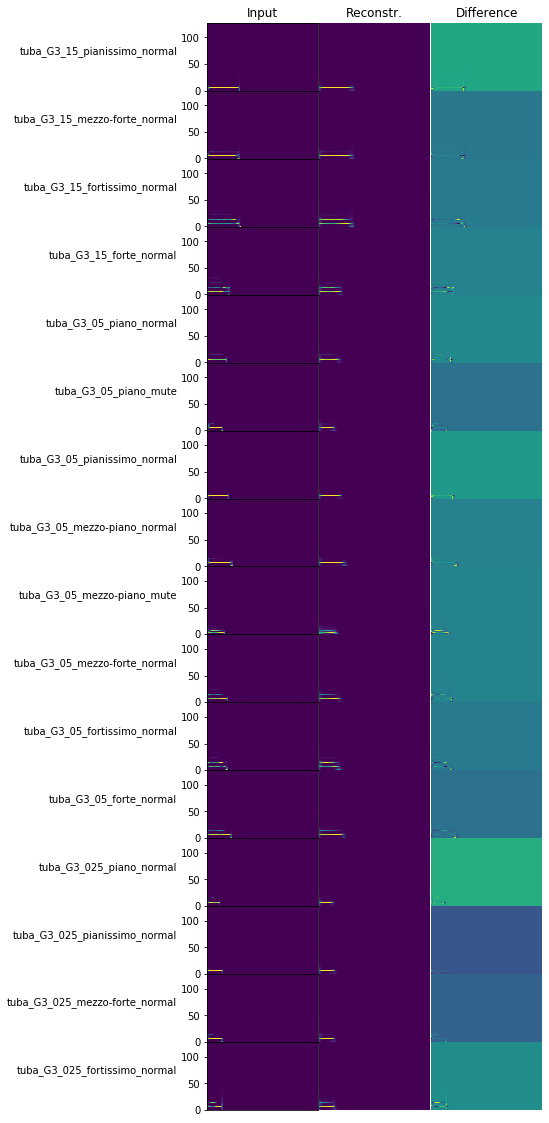

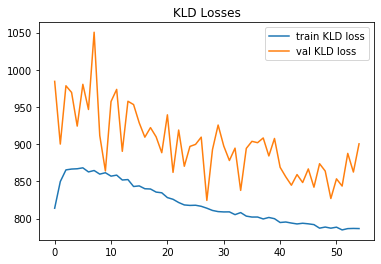

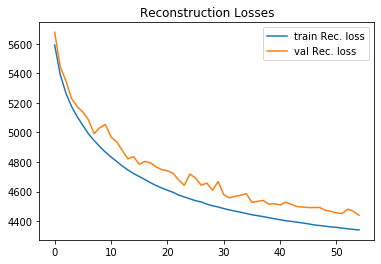

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 61


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4724.31
 training_avg_kld=784.52
 training_avg_rec=4332.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4887.12

Epoch: 62


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4718.96
 training_avg_kld=780.61
 training_avg_rec=4328.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4850.07

Epoch: 63


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4716.61
 training_avg_kld=780.51
 training_avg_rec=4326.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4872.09

Epoch: 64


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4711.37
 training_avg_kld=780.39
 training_avg_rec=4321.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4889.90

Epoch: 65


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4707.70
 training_avg_kld=779.64
 training_avg_rec=4317.88




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4885.14

Epoch: 66


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4704.60
 training_avg_kld=778.83
 training_avg_rec=4315.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4904.28

Epoch: 67


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4701.93
 training_avg_kld=778.30
 training_avg_rec=4312.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4865.62

Epoch: 68


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4698.07
 training_avg_kld=777.49
 training_avg_rec=4309.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4891.55

Epoch: 69


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4693.37
 training_avg_kld=776.24
 training_avg_rec=4305.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4874.96

Epoch: 70


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4692.24
 training_avg_kld=776.13
 training_avg_rec=4304.17



val_avg_loss=4876.02



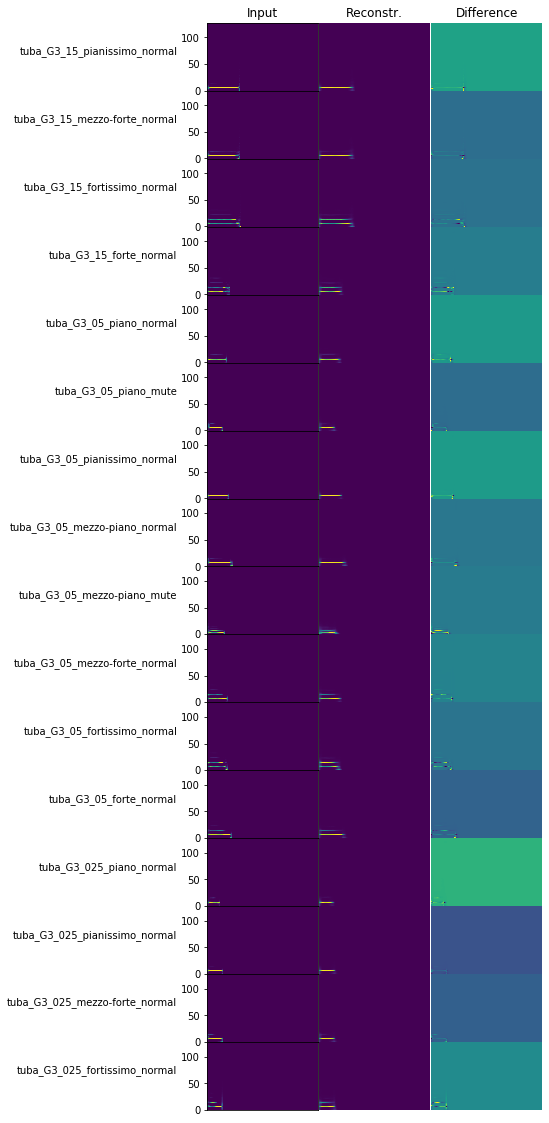

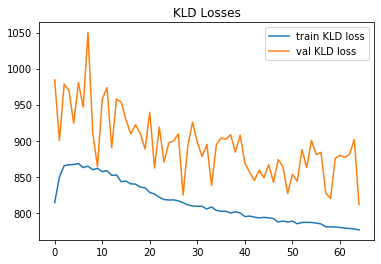

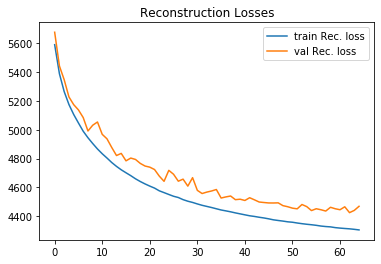

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 71


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4688.28
 training_avg_kld=776.19
 training_avg_rec=4300.19




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4850.05

Epoch: 72


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4682.42
 training_avg_kld=773.57
 training_avg_rec=4295.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4867.18

Epoch: 73


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4682.57
 training_avg_kld=776.30
 training_avg_rec=4294.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4832.43

Epoch: 74


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4678.42
 training_avg_kld=774.13
 training_avg_rec=4291.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4858.02

Epoch: 75


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4675.31
 training_avg_kld=772.55
 training_avg_rec=4289.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4837.41

Epoch: 76


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4671.06
 training_avg_kld=772.35
 training_avg_rec=4284.88




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4847.38

Epoch: 77


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4668.63
 training_avg_kld=772.72
 training_avg_rec=4282.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4859.15

Epoch: 78


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4666.83
 training_avg_kld=770.34
 training_avg_rec=4281.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4850.66

Epoch: 79


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4662.99
 training_avg_kld=770.16
 training_avg_rec=4277.91




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4866.51

Epoch: 80


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4659.95
 training_avg_kld=768.20
 training_avg_rec=4275.85



val_avg_loss=4825.52



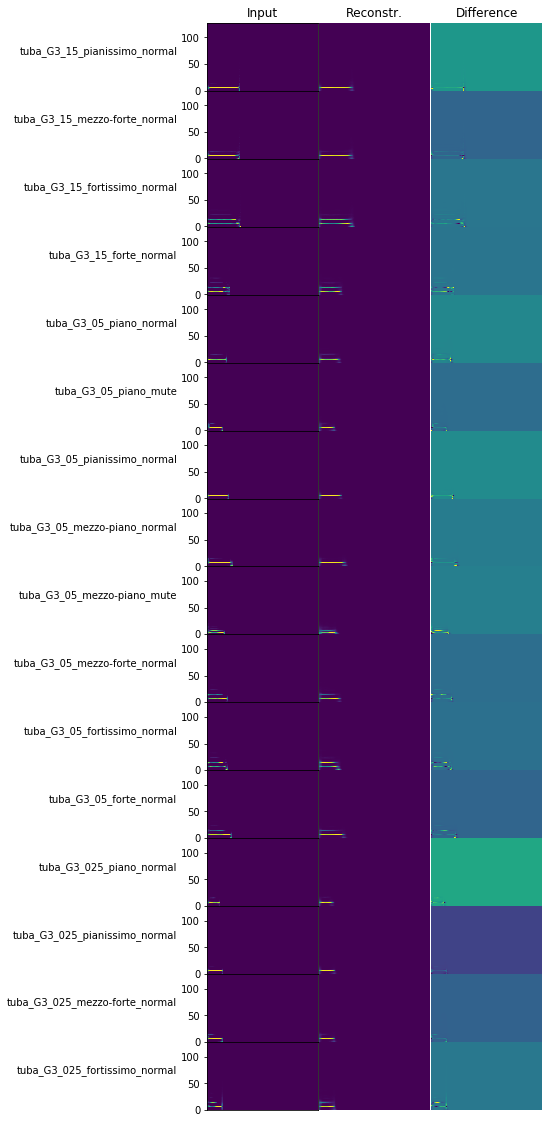

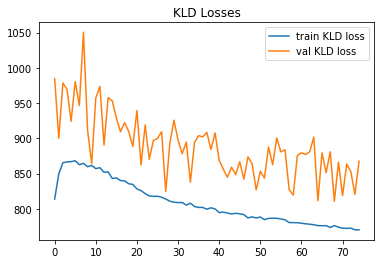

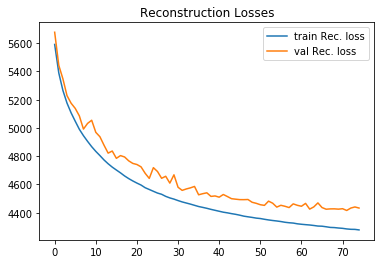

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 81


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4659.01
 training_avg_kld=768.68
 training_avg_rec=4274.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4860.85

Epoch: 82


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4655.15
 training_avg_kld=767.37
 training_avg_rec=4271.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4848.14

Epoch: 83


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4651.51
 training_avg_kld=767.59
 training_avg_rec=4267.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4846.44

Epoch: 84


100%|██████████| 727/727 [01:40<00:00,  7.58it/s]

training_avg_loss=4649.53
 training_avg_kld=767.69
 training_avg_rec=4265.69




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4833.24

Epoch: 85


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4646.63
 training_avg_kld=765.28
 training_avg_rec=4264.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4842.35

Epoch: 86


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4644.23
 training_avg_kld=766.63
 training_avg_rec=4260.92




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4836.01

Epoch: 87


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4642.41
 training_avg_kld=764.91
 training_avg_rec=4259.96




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4861.56

Epoch: 88


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4640.20
 training_avg_kld=764.51
 training_avg_rec=4257.94




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4821.49

Epoch: 89


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4638.31
 training_avg_kld=765.24
 training_avg_rec=4255.69




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4814.04

Epoch: 90


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4635.96
 training_avg_kld=763.06
 training_avg_rec=4254.43



val_avg_loss=4830.73



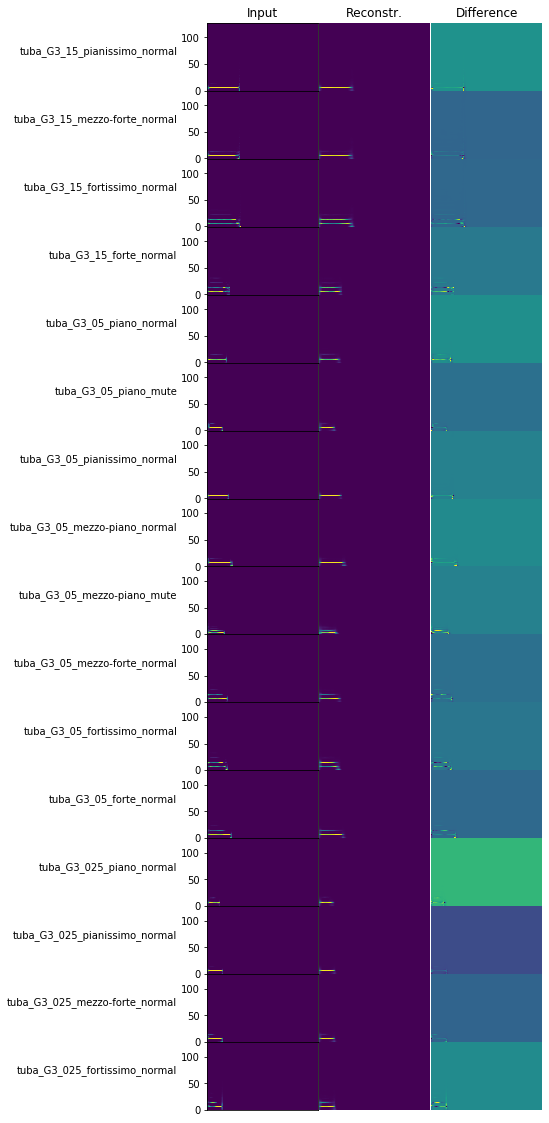

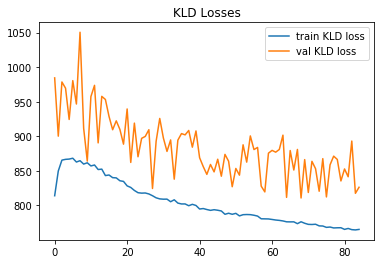

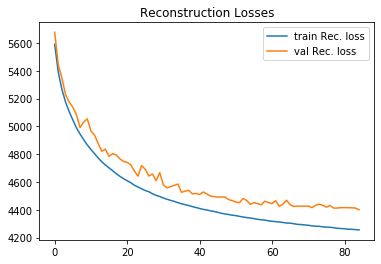

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 91


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4631.82
 training_avg_kld=762.88
 training_avg_rec=4250.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4813.61

Epoch: 92


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4632.14
 training_avg_kld=762.32
 training_avg_rec=4250.98




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4855.52

Epoch: 93


100%|██████████| 727/727 [01:40<00:00,  7.53it/s]

training_avg_loss=4628.83
 training_avg_kld=762.44
 training_avg_rec=4247.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4846.45

Epoch: 94


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4625.85
 training_avg_kld=760.73
 training_avg_rec=4245.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4848.41

Epoch: 95


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4624.71
 training_avg_kld=761.96
 training_avg_rec=4243.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4841.00

Epoch: 96


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4623.92
 training_avg_kld=763.84
 training_avg_rec=4242.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4831.61

Epoch: 97


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4619.95
 training_avg_kld=757.90
 training_avg_rec=4241.01




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4851.18

Epoch: 98


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4615.97
 training_avg_kld=756.98
 training_avg_rec=4237.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4829.07

Epoch: 99


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4616.54
 training_avg_kld=759.21
 training_avg_rec=4236.94




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4816.95

Epoch: 100


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4613.12
 training_avg_kld=758.09
 training_avg_rec=4234.07



val_avg_loss=4811.52



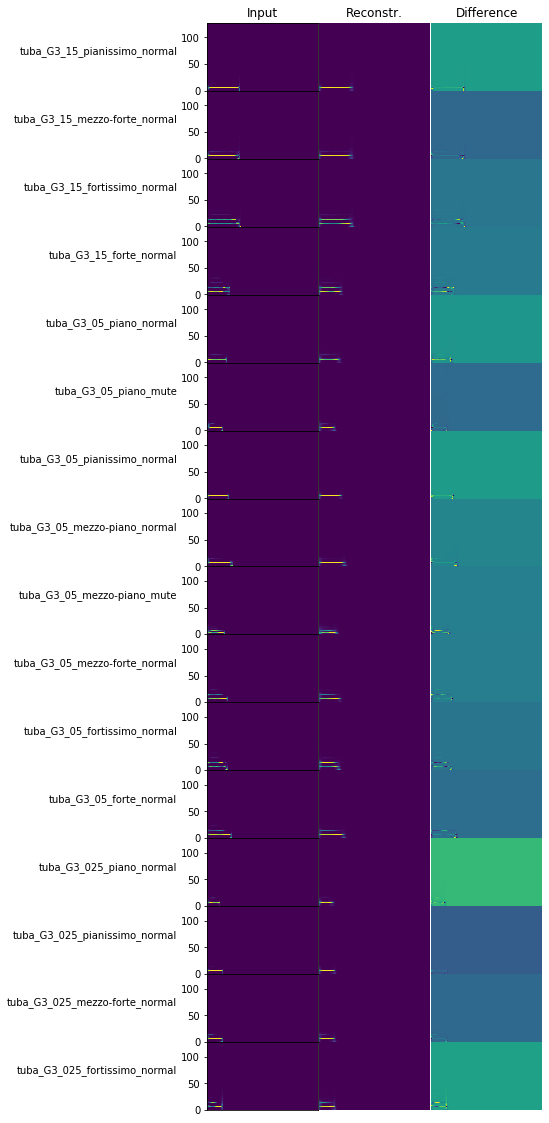

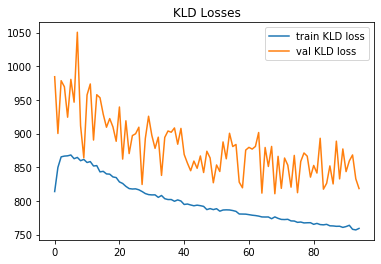

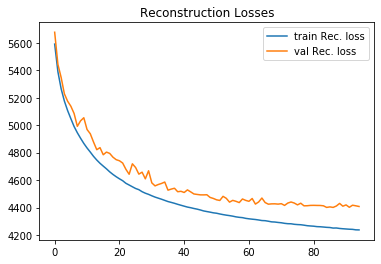

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 101


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4610.99
 training_avg_kld=757.39
 training_avg_rec=4232.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4836.92

Epoch: 102


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4612.53
 training_avg_kld=759.55
 training_avg_rec=4232.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4827.96

Epoch: 103


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4607.98
 training_avg_kld=758.04
 training_avg_rec=4228.96




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4816.44

Epoch: 104


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4606.60
 training_avg_kld=756.82
 training_avg_rec=4228.19




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4831.60

Epoch: 105


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4604.40
 training_avg_kld=756.06
 training_avg_rec=4226.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4823.98

Epoch: 106


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4602.67
 training_avg_kld=755.94
 training_avg_rec=4224.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4862.35

Epoch: 107


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4602.87
 training_avg_kld=758.27
 training_avg_rec=4223.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4830.98

Epoch: 108


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4599.31
 training_avg_kld=755.00
 training_avg_rec=4221.81




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4826.36

Epoch: 109


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4597.19
 training_avg_kld=754.70
 training_avg_rec=4219.83




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4830.12

Epoch: 110


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4594.91
 training_avg_kld=753.18
 training_avg_rec=4218.33



val_avg_loss=4835.81



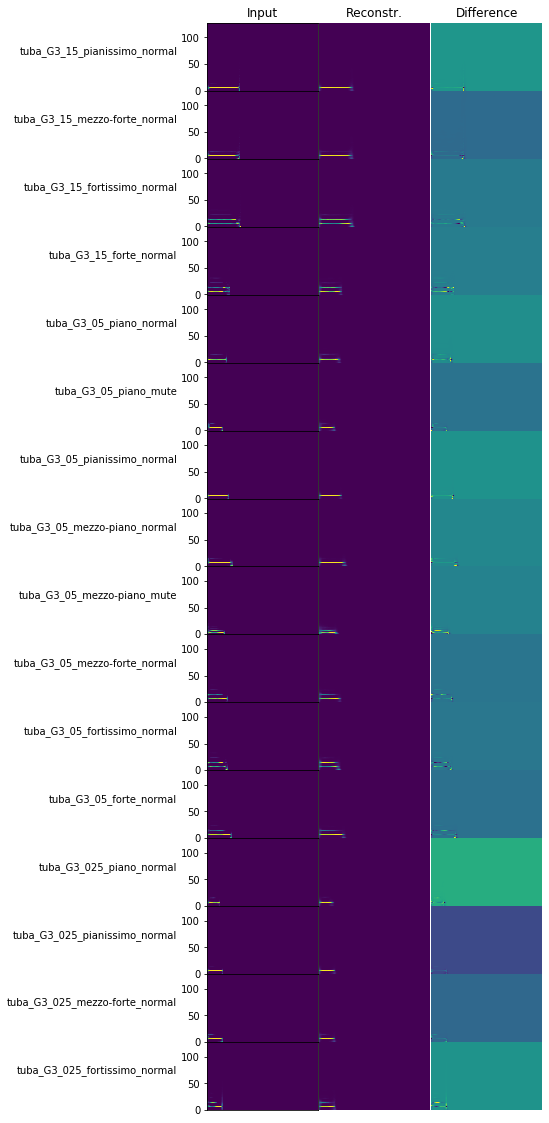

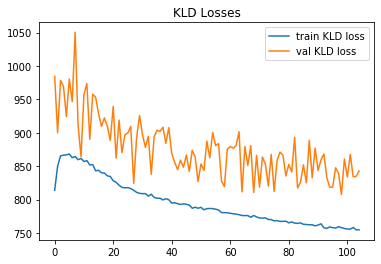

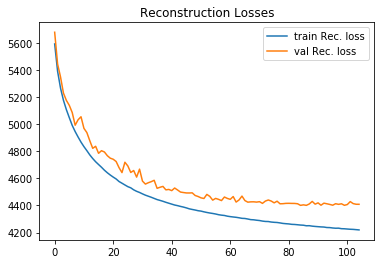

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 111


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4594.47
 training_avg_kld=754.03
 training_avg_rec=4217.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4817.50

Epoch: 112


100%|██████████| 727/727 [01:40<00:00,  7.59it/s]

training_avg_loss=4591.68
 training_avg_kld=752.17
 training_avg_rec=4215.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4852.78

Epoch: 113


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4592.16
 training_avg_kld=754.12
 training_avg_rec=4215.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4820.31

Epoch: 114


100%|██████████| 727/727 [01:40<00:00,  7.52it/s]

training_avg_loss=4589.56
 training_avg_kld=752.35
 training_avg_rec=4213.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4836.24

Epoch: 115


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4587.47
 training_avg_kld=752.12
 training_avg_rec=4211.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4814.77

Epoch: 116


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4585.52
 training_avg_kld=751.68
 training_avg_rec=4209.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4842.46

Epoch: 117


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4582.85
 training_avg_kld=750.60
 training_avg_rec=4207.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4845.59

Epoch: 118


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=4580.50
 training_avg_kld=749.07
 training_avg_rec=4205.97




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4849.49

Epoch: 119


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4581.29
 training_avg_kld=750.18
 training_avg_rec=4206.20




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4817.85

Epoch: 120


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4579.21
 training_avg_kld=751.84
 training_avg_rec=4203.29



val_avg_loss=4830.93



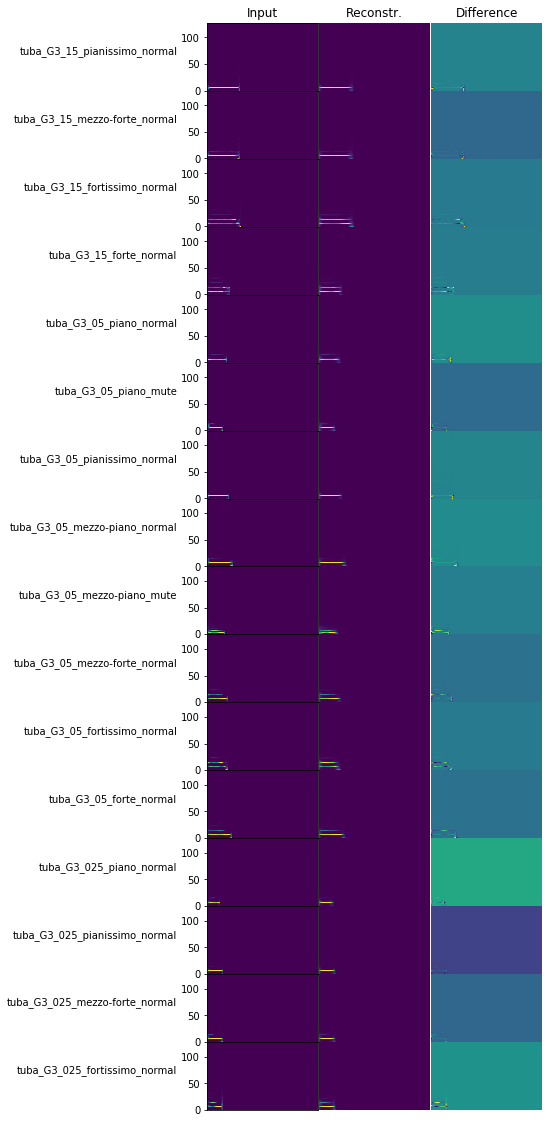

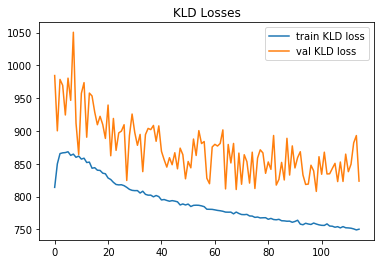

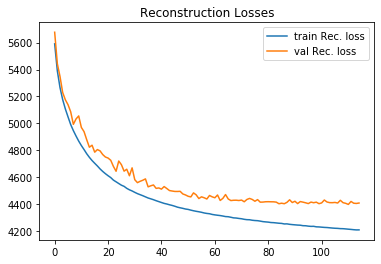

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 121


100%|██████████| 727/727 [01:40<00:00,  7.52it/s]

training_avg_loss=4577.67
 training_avg_kld=748.91
 training_avg_rec=4203.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4812.86

Epoch: 122


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4576.50
 training_avg_kld=748.87
 training_avg_rec=4202.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4813.57

Epoch: 123


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4575.81
 training_avg_kld=748.91
 training_avg_rec=4201.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4841.83

Epoch: 124


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4572.76
 training_avg_kld=747.37
 training_avg_rec=4199.08




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4817.37

Epoch: 125


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=4572.82
 training_avg_kld=749.86
 training_avg_rec=4197.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4813.71

Epoch: 126


 59%|█████▉    | 430/727 [00:59<00:40,  7.28it/s]Process Process-2652:
Process Process-2654:
Process Process-2656:
Process Process-2657:
Process Process-2659:
Process Process-2655:
Process Process-2660:
Process Process-2653:
Process Process-2651:
Process Process-2658:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/carloshe

KeyboardInterrupt
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 920, in wait
    ready = selector.select(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 920, in wait
    ready = selector.select(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 414, in _poll
    r = wait([self]

KeyboardInterrupt: 

In [9]:
training.train_model(input='mel', model_name='TimeConv2D', loss_f='bce')

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>
    
</div>

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>

<button type="button" class="btn btn-primary" style="float:right; background-color:#BA55D3; border:0"><a href="2-chord_prediction.ipynb" style="color:white; text-decoration: none">Go to Chord Detection ⇒</a></button>
    
</div>